*Supervised Machine Learning* by [Lazhar Labiod](https://...), 

Lazhar.labiod@u-paris.fr

**Universite de Paris**

# The Multivariate Normal Density
---

## Why Normal Random Variables?

- Analytically tractable
- Works well when observation comes form a corrupted single prototype
- Is an optimal distribution of data for many classifiers used in practice

## The Univariate Normal Density
---

In [1]:
# Imports
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm # Colormaps
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

sns.set_style('darkgrid')
np.random.seed(42)
#

- $\mathbf{x}$ is a one dimension vector (one feature)
$$
p(\mathbf{x} \mid \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{ \left( -\frac{(\mathbf{x} - \mu)^2}{2\sigma^2}\right)}
$$


In [2]:
def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mean)**2 / (2 * variance)))

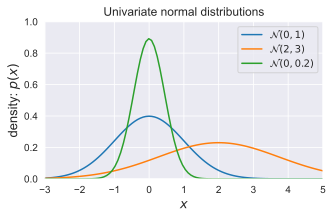

In [3]:
# Plot different Univariate Normals
x = np.linspace(-3, 5, num=100)
fig = plt.figure(figsize=(5, 3))
plt.plot(
    x, univariate_normal(x, mean=0, variance=1), 
    label="$\mathcal{N}(0, 1)$")
plt.plot(
    x, univariate_normal(x, mean=2, variance=3), 
    label="$\mathcal{N}(2, 3)$")
plt.plot(
    x, univariate_normal(x, mean=0, variance=0.2), 
    label="$\mathcal{N}(0, 0.2)$")
plt.xlabel('$x$', fontsize=13)
plt.ylabel('density: $p(x)$', fontsize=13)
plt.title('Univariate normal distributions')
plt.ylim([0, 1])
plt.xlim([-3, 5])
plt.legend(loc=1)
fig.subplots_adjust(bottom=0.15)
plt.show()
#

## Several Features
---

- What if we have several features $\mathbf{x}_1, \mathbf{x}_2,..., \mathbf{x}_d$
- each normally distributed
- may have different means
- may have different variances
- may be dependent or independent of each other
- How do we model their joint distribution?

## Multivariate normal density in d dimensions is:
---
$$
p(\mathbf{x} \mid \mathbf{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^d \lvert\Sigma\rvert}} \exp{ \left( -\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu}) \right)}
$$

$$
%\left(
\Sigma =
\begin{bmatrix}
\sigma^2_{1} & ... & \sigma^2_{1d} \\
 :& : &  : \\
\sigma^2_{d1} & ... &  \sigma^2_{d} 
\end{bmatrix}
%\right)
$$

$$
\mathbf{X}=\begin{bmatrix}
\mathbf{x}_1 & ... & \mathbf{x}_{d} 
\end{bmatrix}^T
$$

$$
\mu=\begin{bmatrix}
\mu_1 & ... & \mu_{d} 
\end{bmatrix}^T
$$

- $\Sigma$ : covariance matrix
- Each $x_i$ is $N(\mu_i , \sigma^2_i )$
- to prove this, integrate out all other features from the joint density

In [4]:
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

Examples of two bivariate normal distributions are plotted below.

The figure on the left is a bivariate distribution with the covariance between $x_1$ and $x_2$ set to $0$ so that these 2 variables are independent:

$$
\mathcal{N}\left(
\begin{bmatrix}
0 \\
0
\end{bmatrix}, 
\begin{bmatrix}
1 & 0 \\
0 & 1 
\end{bmatrix}\right)
$$


The figure on the right is a bivariate distribution with the covariance between $x_1$ and $x_2$ set to be different than $0$ so that both variables are correlated. Increasing $x_1$ will increase the probability that $x_2$ will also increase:


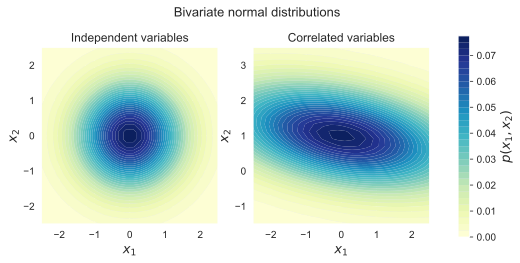

In [5]:
# Plot bivariate distribution
def generate_surface(mean, covariance, d):
    """Helper function to generate density surface."""
    nb_of_x = 50 # grid size
    x1s = np.linspace(-5, 5, num=nb_of_x)
    x2s = np.linspace(-5, 5, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multivariate_normal(
                np.matrix([[x1[i,j]], [x2[i,j]]]), 
                d, mean, covariance)
    return x1, x2, pdf  # x1, x2, pdf(x1,x2)

# subplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
d = 2  # number of dimensions

# Plot of independent Normals
bivariate_mean = np.matrix([[0.], [0.]])  # Mean
bivariate_covariance = np.matrix([
    [1., 0.], 
    [0., 1.]])  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
con = ax1.contourf(x1, x2, p, 33, cmap=cm.YlGnBu)
ax1.set_xlabel('$x_1$', fontsize=13)
ax1.set_ylabel('$x_2$', fontsize=13)
ax1.axis([-2.5, 2.5, -2.5, 2.5])
ax1.set_aspect('equal')
ax1.set_title('Independent variables', fontsize=12)

# Plot of correlated Normals
bivariate_mean = np.matrix([[0.], [1.]])  # Mean
bivariate_covariance = np.matrix([
    [5., -0.8], 
    [-0.8, 1.]])  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
con = ax2.contourf(x1, x2, p, 33, cmap=cm.YlGnBu)
ax2.set_xlabel('$x_1$', fontsize=13)
ax2.set_ylabel('$x_2$', fontsize=13)
ax2.axis([-2.5, 2.5, -1.5, 3.5])
ax2.set_aspect('equal')
ax2.set_title('Correlated variables', fontsize=12)

# Add colorbar and title
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(con, cax=cbar_ax)
cbar.ax.set_ylabel('$p(x_1, x_2)$', fontsize=13)
plt.suptitle('Bivariate normal distributions', fontsize=13, y=0.95)
plt.show()

---
## More on $\Sigma$

$$
%\left(
\Sigma =
\begin{bmatrix}
\sigma^2_{1} & ... & \sigma^2_{1d} \\
 :& : &  : \\
\sigma^2_{d1} & ... &  \sigma^2_{d} 
\end{bmatrix}
%\right)
$$

- $\Sigma$ plays role similar to the role that $\sigma^2$ plays in one dimension
- From $\Sigma$ we can find out
    - The individual variances of features $\mathbf{x}_1 , \mathbf{x}_2 , ..., \mathbf{x}_d$
- If features $\mathbf{x}_i$ and $\mathbf{x}_j$ are
    - independent $\sigma_{ij} =0$
    - have positive correlation $\sigma_{ij} > 0 $
    - have negative correlation $\sigma_{ij} < 0 $


---